In [38]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [25]:
#importing data
dataset = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/13_KNN/Zoo.csv")

In [26]:
dataset.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [28]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=confusion)
    plt.show()


In [55]:
def classification_report(y_test,y_pred):
    # importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred))
    

In [59]:
def ROC_AUC(y_test,y_pred_prob):
    fpr = {}
    tpr = {}
    thresh = {}
    roc_auc = dict()
    classes = np.unique(y_test)

    for i in range(len(classes)):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:, i-1], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], linestyle='--', label='%s vs Rest (AUC=%0.2f)' % (classes[i], roc_auc[i]))

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    auc_score = roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted')
    print("ROC_AUC Score = ", auc_score)

Accuracy of knn classifier on training set: 0.9750
Accuracy of knn classifier on test set: 1.0000

Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



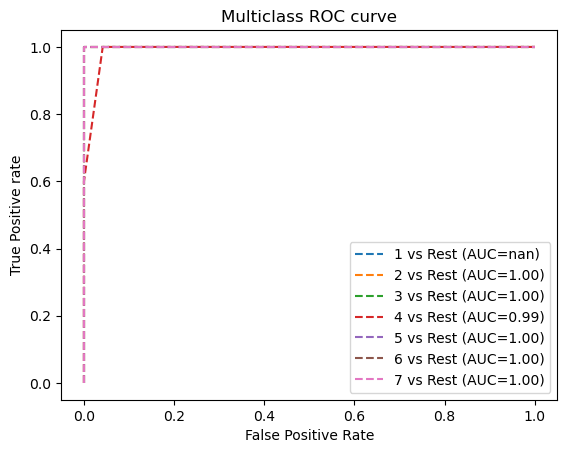

ROC_AUC Score =  0.9980301155115511


In [60]:
def model(dataset):      
    X=dataset.iloc[:,1:-1]# independant variables
    X=pd.get_dummies(X,columns=['legs'])
    y = dataset.iloc[:,-1] #dependant variable

    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
    clf= KNeighborsClassifier()
    clf.fit(X_train, y_train)
    print('Accuracy of knn classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of knn classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
#     y_pred_prob=clf.predict_proba(X_test)
    y_pred_prob=clf.predict_proba(X)
    

    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    ROC_AUC(y,y_pred_prob)
    
model(dataset)


Accuracy of knn classifier on training set: 0.9875
Accuracy of knn classifier on test set: 1.0000

Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



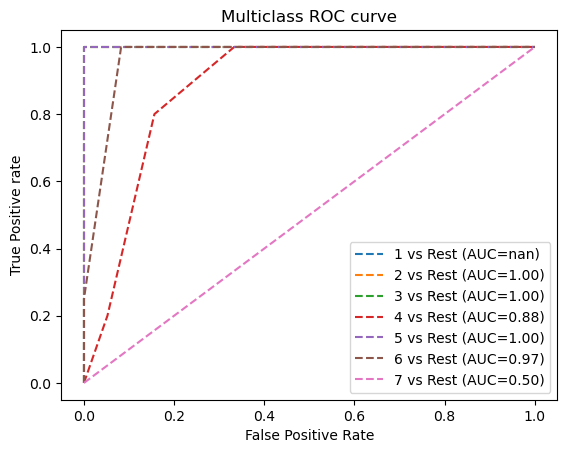

ROC_AUC Score =  0.8615027608530084


In [61]:
def model_scaling(dataset):
    X=dataset.iloc[:,1:-1]# independant variables
    X=pd.get_dummies(X,columns=['legs'])
    y = dataset.iloc[:,-1] #dependant variable

    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
      
    from sklearn.preprocessing import StandardScaler
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)

    from sklearn.neighbors import KNeighborsClassifier
    clf= KNeighborsClassifier()
    clf.fit(X_train, y_train)
    print('Accuracy of knn classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of knn classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
    y_pred_prob=clf.predict_proba(X)

    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    ROC_AUC(y,y_pred_prob)
    
model_scaling(dataset)

In [53]:
##Hypertuning parameters
#List Hyperparameters that we want to tune.
X=dataset.iloc[:,1:-1]# independant variables
X=pd.get_dummies(X,columns=['legs'])
y = dataset.iloc[:,-1] #dependant variable

#train test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print(best_model.best_params_,best_model.best_score_)



{'leaf_size': 1, 'n_neighbors': 1, 'p': 1} 0.9625


## After hypertuning the model is giving best accuracy. Hence this model can be used for  classification of animal category.
